In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_01.ipynb")

In [3]:
rng_seed = 42

## Homework 1

## <em>Intro to Statistics</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***

### Imports

In [4]:
# If the LaTeX is not showing up, run this cell then refresh the notebook page
# !pip install jupyterlab-katex 

In [5]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Inferring a Decay Constant

Unstable particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$. Decay events can be observed only if they occur in a window extending from $x$ = 1cm to $x$ = 20cm. $N$ decays are observed at locations {$x_1$, ... , $x_N$}. What is $\lambda$? <br>

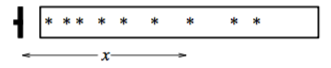

Given $\lambda$, the probability of observing a particle at a distance $x$ is:<br>

\begin{equation}
P(x\ |\ \lambda) =  
\begin{cases}
\frac{1}{\lambda}e^{-x/\lambda}\big/\ Z(\lambda)\ \ \ \ \ \ a < x < b \\
0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \mathrm{otherwise}
\end{cases}
\end{equation}

where
$$ Z(\lambda) = \int_a^b dx \frac{1}{\lambda}e^{-x/\lambda} = \big( e^{-a/\lambda} - e^{-b/\lambda} \big). $$
Here, $a = 1,\ b = 20$.
<br> <br>
<span style="color:red"><i> 1. Write a function for $Z(\lambda)$. Then, use it to write another function for $P(x|\lambda)$. </i></span> <br>
<br>
Check if your function can return a correct value if either $x$ or $L$ is a 2D array. Say $x$ is a scalar, and $L$ is a vector with $N$ elements. If you calculate the product $x*L$, the dimension of $x$ is stretched to $N \times 1$ in order to match that of $L$ ([broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)). If $x$ and $L$ are both vectors, then they must have the same dimensions to perform arithmetic operations on them ($x*L$, $x$+$L$, $x$/$L$, etc).

In [20]:
def Z(L, a, b):
    '''Normalizing constant function for a characteristic length L, assuming that the data are
    truncated between x = a and x = b.
    '''
    return np.exp(-a/L) - np.exp(-b/L)

def pdf_decay(x, L, a, b):
    '''
    Returns P(x|L) for arrays x and L, broadcasting as needed.
    x: array of positions
    L: array of characteristic lengths
    a, b: window limits
    Output shape: (len(x), len(L))
    '''
    x = np.asarray(x)
    L = np.asarray(L)
    # shape (len(x), len(L))
    x_mesh, L_mesh = np.meshgrid(x, L, indexing='ij')
    norm = Z(L_mesh, a, b)
    pdf = np.exp(-x_mesh / L_mesh) / (L_mesh * norm)
    return pdf

In [21]:
x = np.linspace(0, 20, 1000)
L_values = np.array([0.5, 2, 10])
pdfs =  pdf_decay(x,L_values,1,20) # shape (1000, 3)

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 2. Plot $P(x|\lambda)$ as a function of $x$ for $\lambda = 2, 5, 10$. Make sure to label each plot. </i></span>

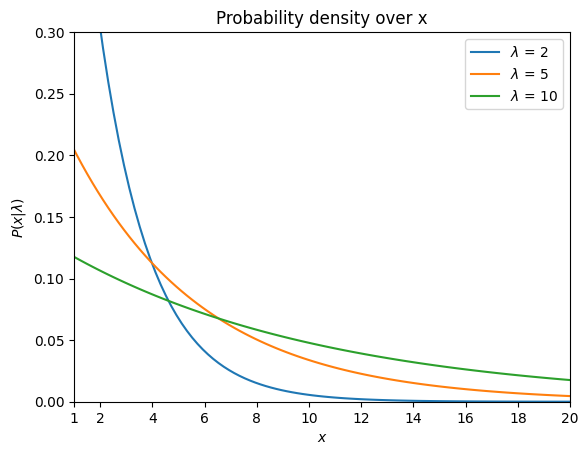

In [22]:
# Create arrays for x and L.
x = np.linspace(1e-1, 20, 100)
L = np.array([2, 5, 10]) # put all necessary values into an np.array L

# Plot the probability desity as a function of x for each lambda.
# Hint: You can use a for-loop and make a plot for each element of an array L. (But you don't
#have to do it in this way.)
# Hint2: You should label each plot. To do this in a for-loop, you should remember that you can
#insert values into a string with the placeholder % (https://docs.python.org/2.4/lib/typesseq-strings.html).

for l in L: # loop over all elements L
    plt.plot(x, pdf_decay(x, l, 1, 20), label=r'$\lambda$ = %d'%l) #Plot pdf of different l in a figure
    plt.title('Probability density over x')

plt.xlim(1, 20)
plt.xticks(np.append(np.array([1]), np.arange(2, 20+1, 2)))
plt.ylim(0, 0.3)
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x|\lambda)$')
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 3. Plot $P(x|\lambda)$ as a function of $\lambda$ for $x = 3, 5, 12$. (This function is known as the <b>likelihood</b> of $\lambda$) Make sure to label each plot. Note that a peak emerges in each plot. </i></span>

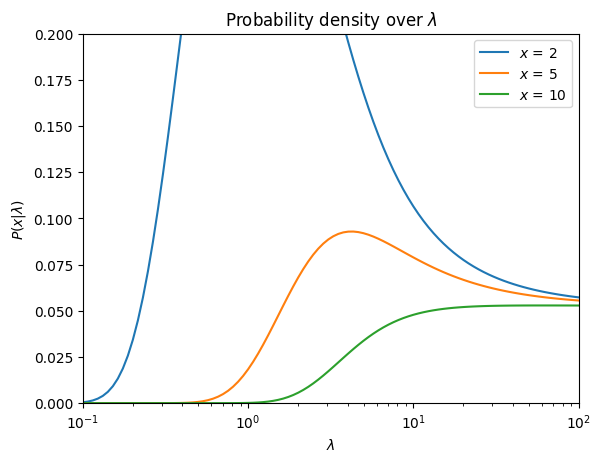

In [12]:
# Create arrays for x and L.
X = np.array([2, 5, 10]) # Create array X containing all x values
L = np.logspace(-1, 2, 100)

# Plot the probability desity as a function of L for each x.
for x in X:
    plt.plot(L, pdf_decay(x, L, 1, 20), label=r'$x$ = %d'%x) 
    plt.title('Probability density over $\\lambda$')

plt.xlim(1.e-1, 1.e2)
plt.ylim(0, 0.2)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$P(x|\lambda)$')
plt.xscale('log')
plt.legend()
plt.show()

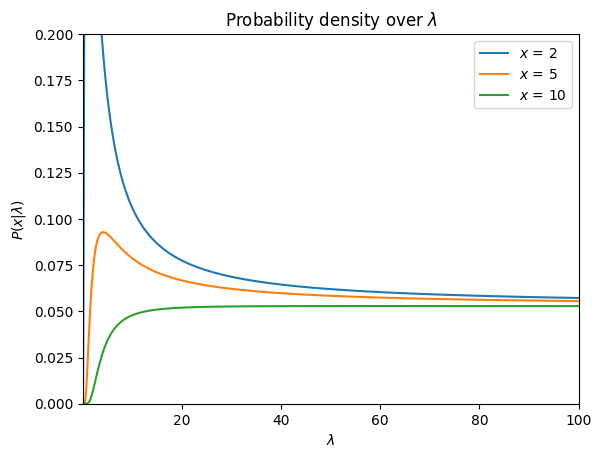

In [14]:
# Same as previous cell here. This just plots it lineraly instead of on a log scale.

# Create arrays for x and L.
x = np.array([2, 5, 10])
L = np.logspace(-1, 2, 100)

# Plot the probability desity as a function of L for each x.
for x in X:
    plt.plot(L, pdf_decay(x, L, 1, 20), label=r'$x$ = %d'%x) 
    plt.title('Probability density over $\\lambda$')

plt.xlim(1.e-1, 1.e2)
plt.ylim(0, 0.2)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$P(x|\lambda)$')
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 4. Plot $P(x|\lambda)$ as a function of $x$ and $\lambda$. Create a surface plot.  </i></span>

In [15]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D

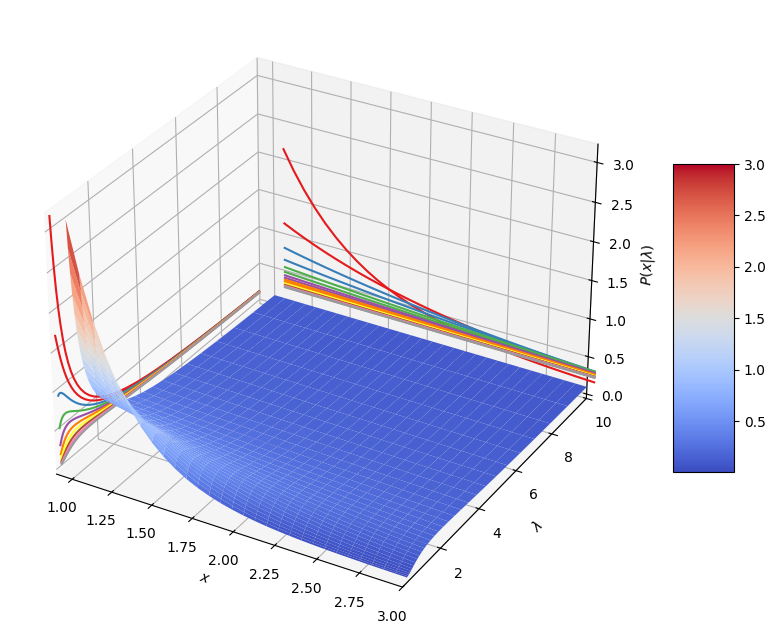

In [ ]:
# Create arrays for x and L. These define your "x" and "y" coordinates.
x = np.linspace(1, 3, 30)
L = np.logspace(-0.5, 1, 30)
# Create coordinate matrices from coordinate vectors.
x, L = np.meshgrid(x, L)

# Evaluate probability densities at all (x,y) coordinates. This is your "z" coordinate.
z = pdf_decay(x, L, 1, 20)

# Make plot
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, L, z, vmax=3, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'), linewidth=0, antialiased=True)

# Add contour plots
cset = ax.contour(x, L, pdf_decay(x, L, 1, 20), 10, zdir='x', offset=0.9, cmap=plt.get_cmap('Set1'))
cset = ax.contour(x, L, pdf_decay(x, L, 1, 20), 20, zdir='y', offset=10.5, cmap=plt.get_cmap('Set1'))

ax.set_xlim(0.9, 3)
ax.set_ylim(1.e-1, 1.e1)


ax.set_xlabel(' $x$ ')
ax.set_ylabel(' $\\lambda$ ')
ax.set_zlabel(' $P(x|\\lambda)$ ')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In the above figure, two contour plots (constant $x$ and $y$ slices) are also included. Compare them to the figures you created in part 2 and 3. They are the same; they correspond to vertical sections through surface.<br>

<!-- END QUESTION -->

Now write Bayes' theorem:<br>

$$ P(\lambda\ |\ \{x_1, ..., x_N\})  = \frac{P(\{x\}|\lambda)P(\lambda)}{P(\{x\})} \propto \frac{1}{(\lambda Z(\lambda))^N}\ \mathrm{exp} \big( -\sum_1^N x_n/\lambda \big) P(\lambda)
$$

<span style="color:red"> <i> 5. Define the likelihood function $P(\{x\}|\lambda)$ and plot $$P(\{x \} = \{1.5, 2, 3, 4, 5, 12\}|\lambda)$$ as a function of $\lambda$. Estimate the peak posterior value of $\lambda$ and the error on $\lambda$ by fitting to a gaussian at the peak.  </i></span>

In [18]:
def likelihoodP(x, L):
    'The likelihood function given a dataset (x array) and a characteristic length L'
    return np.prod(pdf_decay(x, L, 1, 20),axis = 0)

In [ ]:
# Create an array for L. Assume that it is evenly spaced numbers over the interval (1e-1, 1e2).
L = np.logspace(-1, 2, 1000)
# Create an array for x.
x = np.array([1.5,2,3,4,5,12])

# Evaluate the likelihood function and plot it as a function of L
P = likelihoodP(x, L)

# Plot the figure below:


plt.semilogx( L, P )

plt.xlim(1.e-1,1.e+2)
plt.ylim(0, 1.4e-6)
plt.xlabel(' $\\lambda$ ')
plt.ylabel(' $P(x|\lambda)$ ')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
/var/folders/7c/kwhn06r91h57xlqx9rqvvpmm0000gn/T/ipykernel_69768/3438312839.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(' $P(x|\lambda)$ ')
/var/folders/7c/kwhn06r91h57xlqx9rqvvpmm0000gn/T/ipykernel_69768/3438312839.py:17: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel(' $P(x|\lambda)$ ')


ValueError: operands could not be broadcast together with shapes (6,) (1000,) 

In [ ]:
# How is the posterior related to the likelihood and the prior?
# Answer as a comment here:
...

# Estimate the peak posterior value of L
max_L = ...

print("The peak posterior value of the characteristic length is = ", max_L)

# Plot the figure below:


plt.semilogx( ... )
plt.axvline(max_L, ls='--', c='k')

plt.xlim(1.e-1,1.e+2)
plt.ylim(0, 1.4e-6)
plt.xlabel(' ... ')
plt.ylabel(' ... ')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

In [ ]:
# Estimate the error on L  by fitting to a gaussian at the peak
# Import packages for curve fitting
from scipy.optimize import curve_fit

# Create an array of L near L_max
L = np.linspace(max_L-0.2, max_L+0.2, 100)
x = ...

# Define Gaussian function
def gaussian(x, Amp, mu, sig):
    ...

# Fit a Gaussian function to a data
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
popt, pcov = curve_fit( ... )

plt.plot( ... , 'b-', label = 'likelihood')
plt.plot( ... , 'r--', label='fit')
plt.legend()
plt.show()

Error = ...
print("The error on L is estimated to be = ", Error)

<span style="color:red"> <i> 6. Let's say that it was previously believed that the characteristic length $\lambda$ were $3.5\pm2.0$. Modelling this prior $P(\lambda)$ belief with a Gaussian distribution, write a new function that returns the posterior function for this dataset (up to $\lambda$-independent normalization). Allow this function to take general mean and standard deviation of the prior in order to do the last part of this problem. Use this function to estimate the new peak posterior value of $\lambda$. </i></span>

In [ ]:
# Write a new posterior function for this dataset (up to lambda-independent normalization)
# This should take the mean and standard deviation of the prior as input.
def posteriorP(prior_mu, prior_sig, x, L):
    '''
    The posterior function given a dataset (x array) and a characteristic length L,
    assuming a gaussian prior with mean prior_mu and standard deviation prior_sig
    '''
    ...

# Using the given prior belief, determine the maximum:

# Go back to the general unbiased spacing
L = np.logspace(-1, 2, 1000)
x = ...

# Evaluate the new posterior function at the above L array
P = ...

# Estimate the new peak posterior value of L
max_L = ...
print("The new peak posterior value of the characteristic length is = ", max_L)

<span style="color:red"> <i> 7. Determine the limiting behavior of this new peak posterior value as the uncertainty on the prior belief goes to zero and as it goes to infinity by evaluating this peak posterior value for uncertainties of 1e-3 and 1e3. </i></span>

In [ ]:
# Determine maximum posterior value of lambda for uncertainty of 1e-3

# Evaluate the new posterior function at the above L array
P = ...

# Estimate the new peak posterior value of L
max_L_lowPrior = ...
print("The peak posterior value of the characteristic length with extremely small prior uncertainty is = ", max_L_lowPrior)

# Determine maximum posterior value of lambda for uncertainty of 1e3

# Evaluate the new posterior function at the above L array
P = ...

# Estimate the new peak posterior value of L
max_L_highPrior = ...
print("The new peak posterior value of the characteristic length with extremely high prior uncertainty is = ", max_L_highPrior)

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 8. Why should we expect these values?
   </i></span>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

***

#### Problem 2 - Entropy and Probabilities

**Motivation:** In the lecture we learned that entropy is a measure of the amount of information we have about a system. In this excerise, we also want to simulate how entropy evolves over time.

Imagine that we have $N$ dice which are all starting with the same number, say 3 faced up. 



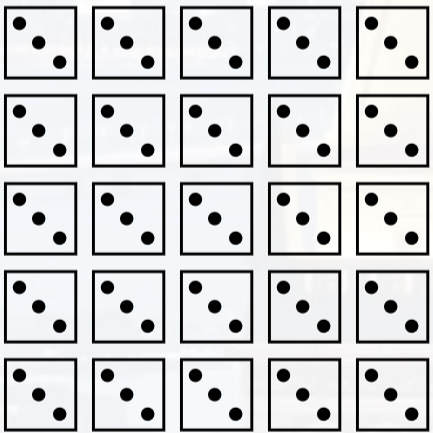

Now, we pick a die randomly, roll it and put it back. There is a great chance that this die shows another number faced up.

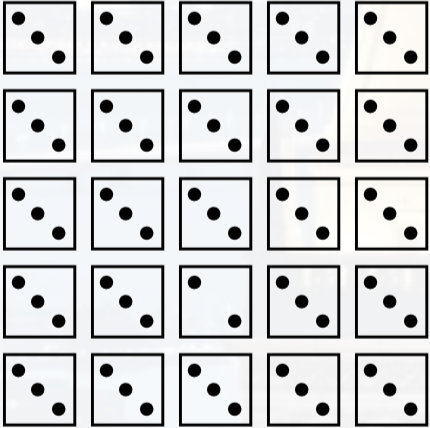

We repeat this process $M$ times. For each time step we want to calculate the **entropy S**<br>
<br>
$S = - \Sigma_{i=1}^{6}\,\,p_i\, ln\left(p_i\right)$<br>
<br>
where $p_i = n_i/N$ and $n_i$ are all those dice showing the number $i$ faced up.<br>

**Exercise:**


Write a code, starting from the sniplet below, that calculates the entropy $S$ for each time step $t$ and plots $S$ as a function of $t$. How does the entropy $S$ evolve in time for small $N = 5, 10, 15$ and for large $N>100$?<br>

In [ ]:
#function illustrates the increase of entropy by rolling ONE die among N 
#dice each of M time steps by starting with a homogenious set and evolving
#with a poissonian time keeper (Gillespie alg)

def random_machine(N, M):
    """
    Args:
    
    """
    
    np.random.seed(rng_seed)
    I = 6 #number of states: I = 6 for a die

    #N dice, all set to state "three" for t=1
    Dice    = 3*np.ones((N,M))
    Entropy = np.zeros((M))
    
    Emax    = np.log(I)#max entropy
    e_calc  = np.zeros((I))
    
    #SETTING TIME
    #generate M random numbers between 0 and 1 (uniformly dist)
    R      =  np.random.uniform(0,1,(M,1))
    Tau    = -np.log(R)/N
    T      =  np.cumsum(Tau)

    ########################################################################
        # YOUR ANSWER HERE   
    ########################################################################

    #plotting histogram of states
    
    labels, counts = np.unique(Dice[:,-1], return_counts = True)
    plt.bar(labels, counts, align = 'center', width = 0.1, color = 'k')
    plt.gca().set_xticks(labels)
    plt.xlabel('states')
    plt.ylabel('#')
    plt.title('states after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.show()
    
    #plotting evolution of entropy
    plt.plot(T, Entropy, '-*', linewidth = 2, color = [0.8, 0.1, 0.2],\
             label = '$S(t)$')
    plt.plot([0, T[-1]], [Emax, Emax], 'k-', linewidth = 3, label = '$S_{max}$')
    plt.xlabel('time')
    plt.ylabel('total entropy')
    plt.title('after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.legend()
    plt.show()

    return Dice, Entropy

In [ ]:
dice, entropy = random_machine(10, 100)

#### Problem 3 - Biased Coin

When spun on edge 256 times, a Belgian one-euro coin came up heads 142 times and tails 114. Do these data give evidence that the coin is biased rather than fair?


We compare the models $\mathcal{H}_0$ - the coin is fair - and $\mathcal{H}_1$ - the coin is biased. 

First, suppose that the model $\mathcal{H}_1$ assumes a uniform prior distribution for $p$ (the probability of getting heads in a single toss): $P(p|\mathcal{H}_1) = 1$.

Let the data $D$ be a sequence which contains counts of the two possible outcomes (H - head / T - tail): e.g. HHTHT, HHHTTHTT, etc. 

Given a particular $p$, the probability that $F$ tosses results in a sequence $D$ of $F_H$ heads and $F_T$ tails is:
$$ P(D|p,\mathcal{H}_1) = p^{F_H} (1-p)^{F_T}. $$

Then,
$$ P(D|\mathcal{H}_1) = \int_0^1 dp\ p^{F_H} (1-p)^{F_T} = \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} .$$
Note that the above integral is a "Beta function" $B(F_H+1, F_T+1)$ and can be written in terms of the gamma function. (See http://www.math.uah.edu/stat/special/Beta.html)

The gamma function is an extension of the factorial function $\Gamma(n+1) = n!$

$$ \frac{\Gamma(F_H+1)\Gamma(F_T+1)}{\Gamma(F_H+F_T+2)} = \frac{F_H! F_T!}{(F_H+F_T+1)!} $$

Similarly,
$$ P(D|\mathcal{H}_0) = \big(\frac{1}{2}\big)^F. $$

<span style="color:red"><i> 1. Find the likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the uniform prior of $\mathcal{H}_1$. Which model does the data favor? <i></span>

(Hint: If the argument of the gamma function is large, math.gamma() overflows. You can prevent this by using the fact:

$\log(xy/z) = \log(x)+\log(y)-\log(z)$

Then, you can evaluate $P = \Gamma(x)*\Gamma(y)/\Gamma(z)$ in the following way:

$$ Q = log(P) = log(\Gamma(x))+log(\Gamma(y))-log(\Gamma(z)) $$
$$ P = e^Q $$

You can easily evaluate logarithm of the gamma function using "lgamma" (from math import lgamma) see https://docs.python.org/2/library/math.html)

In [ ]:
F = ...
F_H = ...
F_T = F - F_H

from math import factorial, log, exp, lgamma

# Using factorial
Likelihood_H1 = ...
Likelihood_H0 = ...

ratio = ...


print("The likelihood ratio is = ", ratio)

answer = ... # provide either 'H0', 'H1' or 'Same' as a string for the answer. note that a space or case different will result in an incorrect result.
print("The data give evidence in favor of " + answer)

<!-- BEGIN QUESTION -->

Instead of assuming a uniform prior, suppose that we add a small bias, and consequently the prior were presciently set: 

$$ P(p|\mathcal{H}_1, \alpha) = \frac{1}{Z(\alpha)}p^{\alpha-1}(1-p)^{\alpha-1},\ \  \mathrm{where}\ \ Z(\alpha) = \Gamma(\alpha)^2/\Gamma(2\alpha) $$
<br>
<span style="color:red"><i> 2. Find the analytic likelihood ratio $\frac{P(D|\mathcal{H}_1)}{P(D|\mathcal{H}_0)}$, assuming the above prior of $\mathcal{H}_1$. </i></span><br>
(Hint: $ p(D|\mathcal{H}_1,\alpha) = \int_0^1 p(D|p,\mathcal{H}_1)P(p|\mathcal{H}_1, \alpha) dp $)


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"><i> 3. Using your result from part 2, find the values of the likelihood ratios. Let $\alpha$ = \{ .37, 1.0, 2.7, 7.4, 20, 55, 148, 403, 1096 \}. </i> </span>

In [ ]:
alpha = ...

def likelihood_ratio(F_H, F_T, alpha):
    ...

ratio = np.zeros_like(alpha)
for i in range(len(alpha)):
    ratio[i] = likelihood_ratio(F_H, F_T, alpha[i])

print("For alpha = ", alpha, ", the likelihood ratios are = ", np.around(ratio, decimals=2), "respectively.")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 4. Does the likelihood ratio for $\mathcal{H}_1$ over $\mathcal{H}_0$ increases as $\alpha$ increases? </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<span style="color:red"> <i> 5. Now, let $\mathcal{H}_1$ be the model in which the probability of getting heads is descrete at 142/256. What is the likelihood in this case? </i></span><br>

In [ ]:
F = ...
F_H = ...
F_T = F - F_H

Likelihood_H1 = ...
Likelihood_H0 = ...

ratio = ...

print("The likelihood ratio is = ", ratio)

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 6. Explain the above result. </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<span style="color:red"><i> 7. Now let us test the null hypothesis. Assuming the central limit theorem, we model the binomial as a gaussian centered at $\mu = F/2$ and with the width given by $\sigma^2 = F*(p_{heads})*(p_{tails})$. (in this case, $p_{heads} = p_{heads} = 1/2$) </i></span><br>

In [ ]:
# Define mu (mean) and sigma (variance)
mu = ...
sigma = np.sqrt( ... )

# Calculate Z.
Z = abs(F_H-mu)/sigma

print("F_H is %.2f sigma away from the mean." %Z)

# Integrate a normal distribution from x=F_H to x=np.inf
def gaussian(x, mu, sigma):
    ...

pvalue = quad( ... )[0]*100

print("The p-value is %.2f percent." %pvalue)

***

#### Problem 4 - Monty Hall

On a game show, a contestant is told the rules as follows: <br>
<br>
There are three doors, labelled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.<br>
<br>
At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.<br>
<br>
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 2, revealing nothing behind the door, as promised. Should the contestant (a) stick with door 1, or (b) switch to door 3, or (c) does it make no difference?

<!-- BEGIN QUESTION -->

Let $\mathcal{H}_i$ denote the hypothesis that the prize is behind door $i$. We make the following assumptions: the three hypotheses $\mathcal{H}_1, \mathcal{H}_2, \mathcal{H}_3$ are equiprobable a <i>priori</i>, i.e., <br>
<br>
$$ P(\mathcal{H}_1) = P(\mathcal{H}_2) = P(\mathcal{H}_3) = \frac{1}{3} $$
<br>
The datum we receive, after choosing door 1, is one of $D$ = 3 and $D$ = 2 (meaning door 3 or 2 is opened, respectively).<br>
<span style="color:red"> <i> 1. Find $P(D=2|\mathcal{H}_1), P(D=3|\mathcal{H}_1), P(D=2|\mathcal{H}_2), P(D=3|\mathcal{H}_2), P(D=2|\mathcal{H}_3), P(D=3|\mathcal{H}_3)$. </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

Now, using Bayes’ theorem, we evaluate the posterior probabilities of the hypotheses:<br>
$$ 
P(\mathcal{H}_i|D=2) = \frac{P(D=2|\mathcal{H}_i)P(\mathcal{H}_i)}{P(D=2)} 
$$ 

<span style="color:red"><i> 2. First, we need to calculate the normalizing constant (denominator). Find $P(D=2), P(D=3)$ </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"> <i> 3. Evaluate the posterior probability and argue if the contestant should switch to door 3. <br>
<br>Alternatively, you can perform a thought experiment in which the game is played with 100 doors. The rules are now that the contestant chooses one door, then the game show host opens 98 doors in such a way as not to reveal the prize, leaving the contestant’s selected door and one other door closed. The contestant may now stick or switch. Where do you think the prize is? </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

***
Imagine that the game happens again and just as the gameshow host is about to open one of the doors a violent earthquake rattles the building and one of the three doors flies open. It happens to be door 3, and it happens not to have the prize behind it. The contestant had initially chosen door 1.<br><br>
Repositioning his toupee, the host suggests, ‘OK, since you chose door 1 initially, door 3 is a valid door for me to open, according to the rules of the game; I’ll let door 3 stay open. Let’s carry on as if nothing happened.’
Should the contestant stick with door 1, or switch to door 2, or does it make no difference? Assume that the prize was placed randomly, that the gameshow host does not know where it is, and that the door flew open because its latch was broken by the earthquake.<br><br>
[A similar alternative scenario is a gameshow whose confused host forgets the rules, and where the prize is, and opens one of the unchosen doors at random. He opens door 3, and the prize is not revealed. Should the contestant choose what’s behind door 1 or door 2? Does the optimal decision for the contestant depend on the contestant’s beliefs about whether the gameshow host is confused or not?]

***
If door 3 is opened by an earthquake, the inference comes out differently – even though visually the scene looks the same. The nature of the data, and the probability of the data, are both now different. The possible data outcomes are, firstly, that any number of the doors might have opened. We could label the eight possible outcomes <b>d</b> = (0,0,0),(0,0,1),(0,1,0),(1,0,0),(0,1,1),...,(1,1,1). <br><br>
Secondly, it might be that the prize is visible after the earthquake has opened one or more doors. So the data $D$ consists of the value of <b>d</b>, and a statement of whether the prize was revealed. It is hard to say what the probabilities of these outcomes are, since they depend on our beliefs about the reliability of the door latches and the properties of earthquakes, but it is possible to extract the desired posterior probability without naming the values of $P($<b>d</b>$|\mathcal{H}_i)$ for each <b>d</b>. <br><br>
All that matters are the relative values of the quantities $P(D|\mathcal{H}_1)$, $P(D|\mathcal{H}_2)$, $P(D|\mathcal{H}_3)$, for the value of $D$ that actually occurred. The value of $D$ that actually occurred is ‘<b>d</b> = (0, 0, 1), and no prize visible’.

<!-- BEGIN QUESTION -->

<span style="color:red"><i> 4. Consider the Earthquake case. How does $P(D|\mathcal{H}_1)$ compare with $P(D|\mathcal{H}_2)$? What is $P(D|\mathcal{H}_3)$? Find $P(D|\mathcal{H}_1)/P(D)$ and $P(D|\mathcal{H}_2)/P(D)$. </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<span style="color:red"> <i>  5. Evaluate the posterior probability and argue if the contestant should switch. </i></span><br>

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Upload the .zip file to gradescope!

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True)